# Gaussian Beams

In [114]:
import numpy as np
pi = np.pi
from matplotlib import pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
plt.rcParams['text.latex.preamble']=[r"\usepackage{upgreek}"]
plt.rcParams.update({'text.usetex' : True,
                     'font.size' : 10,
                     'font.family' : 'lmodern',
                     'text.latex.unicode': True,
                     'axes.labelpad' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'lines.linewidth' : 1,}) 

In [115]:
lda = 532e-9
w0 = lda
zR = pi*w0**2/lda
k = 2*pi/lda

def w(z):
    return w0*np.sqrt(1+(z/zR)**2)

def R(z):
    return z*(1+(zR/z)**2)

def E(r,z):
    return w0/w(z)*np.exp(-(r/w(z))**2)*np.exp(-1j*k*z-1j*k*r**2/(2*R(z))+1j*np.arctan(z/zR))

In [74]:
x = np.linspace(-5e-6, 5e-6,1000)
y = np.linspace(-5e-6, 5e-6,1000)
X, Y = np.meshgrid(x, y)

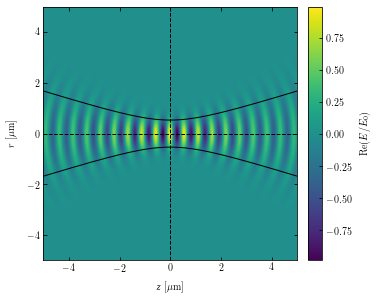

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.pcolormesh(Y*1e6, X*1e6, np.real(E(X,Y)), cmap='viridis')
ax.plot(x*1e6, w(x)*1e6, 'k')
ax.plot(x*1e6, -w(x)*1e6, 'k')
ax.axvline(x=0, c='k', ls='--')
ax.axhline(y=0, c='k', ls='--')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.2, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('$z$ [µm]')
ax.set_ylabel('$r$ [µm]')
cbar.ax.set_ylabel(r'Re$(E/E_0)$')
plt.show()

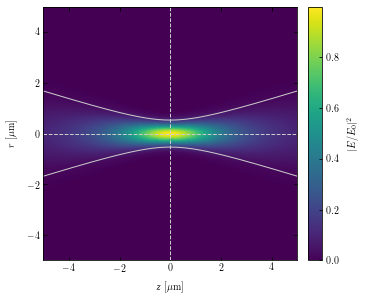

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.pcolormesh(Y*1e6, X*1e6, np.abs(E(X,Y))**2, cmap='viridis')
ax.plot(x*1e6, w(x)*1e6, '.8')
ax.plot(x*1e6, -w(x)*1e6,'.8')
ax.axvline(x=0, c='.8', ls='--')
ax.axhline(y=0, c='.8', ls='--')
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.2, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('$z$ [µm]')
ax.set_ylabel('$r$ [µm]')
cbar.ax.set_ylabel(r'$|E/E_0|^2$')
plt.show()